In [16]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
encoding_dim = 32  

input_img = keras.Input(shape=(3072,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [17]:
encoder = keras.Model(input_img, encoded)

In [18]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
from keras.datasets import cifar10
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()

In [21]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [22]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
196/196 [==============================] - 6s 19ms/step - loss: 0.6574 - val_loss: 0.6416
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6356 - val_loss: 0.6320
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6303 - val_loss: 0.6290
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6273 - val_loss: 0.6259
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6244 - val_loss: 0.6235
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6220 - val_loss: 0.6230
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6199 - val_loss: 0.6208
Epoch 8/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6181 - val_loss: 0.6178
Epoch 9/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6165 - val_loss: 0.6179
Epoch 10/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6154 - val_lo

In [23]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [24]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(3072,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [27]:
input_img = keras.Input(shape=(3072,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)
encoded = layers.Dense(1, activation='relu')(encoded)

decoded = layers.Dense(2, activation='relu')(encoded)
decoded = layers.Dense(4, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(3072, activation='sigmoid')(decoded)

In [28]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
196/196 [==============================] - 5s 21ms/step - loss: 0.6912 - val_loss: 0.6901
Epoch 2/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6895 - val_loss: 0.6895
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6892 - val_loss: 0.6894
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 9/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6891 - val_loss: 0.6894
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 0.689

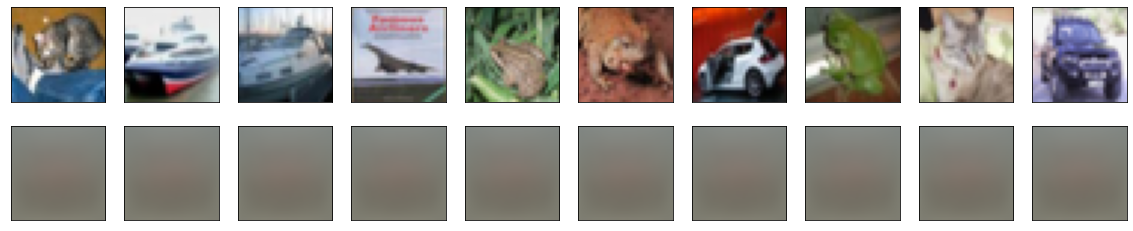

In [33]:
decoded_imgs = autoencoder.predict(x_test)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,-1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32,32, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


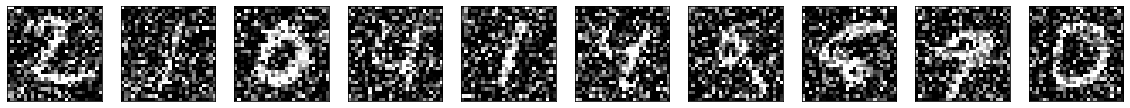

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 11s 8ms/step - loss: 0.1639 - val_loss: 0.1184
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1144 - val_loss: 0.1098
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1087 - val_loss: 0.1056
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1054 - val_loss: 0.1033
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1034 - val_loss: 0.1019
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1019 - val_loss: 0.1006
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1007 - val_loss: 0.0998
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0991 - val_loss: 0.0981
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0985 - val_l

313/313 [==============================] - 1s 2ms/step


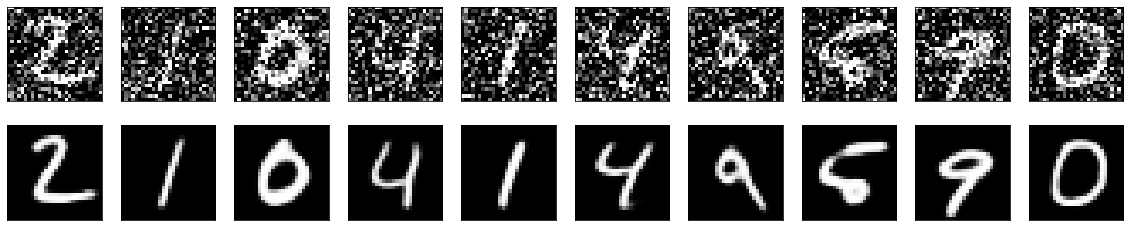

In [ ]:
decoded_imgs2 = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()